# **The Sparks Foundation (TSF)**
# **Data Science & Business Analytics Internship in GRIP**
# **By: SAURABH SINGH**
# **Task-2: Prediction using Unsupervised ML**
**Problem Statement:-**
  * Predict the optimum number of clusters and represent it visually.

## **Importing Necessary Libraries**

In [35]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

## **Importing Data**

In [36]:
data=pd.read_csv('/content/drive/MyDrive/Projects and Data/Iris.csv')

In [37]:
data

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


## **Exploring the Data**

In [38]:
data.shape

(150, 6)

In [39]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [40]:
data.isnull().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

## **Dropping ID Column**

In [41]:
data.drop('Id',axis=1,inplace=True)

In [42]:
data.columns

Index(['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
       'Species'],
      dtype='object')

## **Check for the duplicates**

In [43]:
print("Duplicate Rows: ",data.duplicated().sum())

Duplicate Rows:  3


## **Drop duplicate rows**

In [44]:
data.drop_duplicates(inplace=True) 
data.shape[0] #give number of rows. Similarly, data.shape[1] will give number of columns
# Now number of rows left 147, earlier there was 150 rows.

147

## **Check for any outliers in the numeric data**

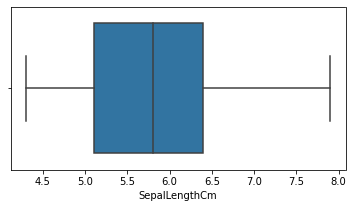

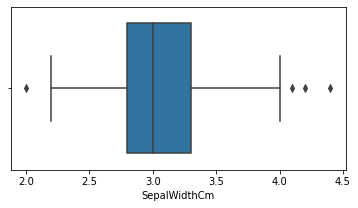

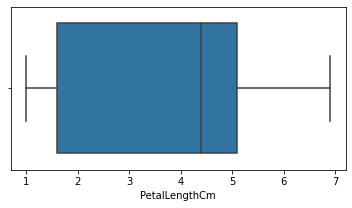

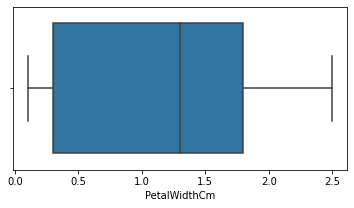

In [45]:
for i in data.columns:
  if data[i].dtype=='float64':
    plt.figure(figsize=(6,3))
    sns.boxplot(data[i])
    plt.show()

## **Treating outliers present in the SepalWidthCm Column**

In [46]:
q1,q3=np.percentile(data['SepalWidthCm'],[25,75])
iqr=q3-q1
lower_fence=q1-(1.5*iqr)
upper_fence=q3+(1.5*iqr)
data['SepalWidthCm']=data['SepalWidthCm'].apply(lambda x: upper_fence if x>upper_fence
                                                else lower_fence if x<lower_fence else x)

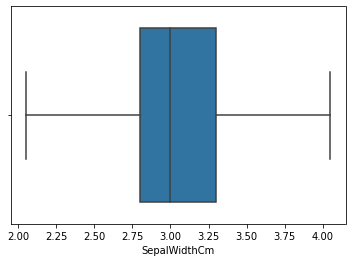

In [47]:
sns.boxplot(data['SepalWidthCm']);

## **Understanding the data**

Iris-versicolor    50
Iris-virginica     49
Iris-setosa        48
Name: Species, dtype: int64


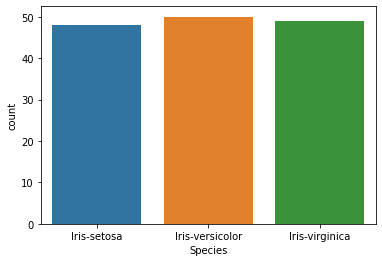

In [48]:
# Target class
print(data.Species.value_counts())
sns.countplot(data.Species)

In [49]:
data.describe()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,147.000000,147.000000,147.000000,147.000000
mean,5.856463,3.052381,3.780272,1.208844
std,0.829100,0.426331,1.759111,0.757874
min,4.300000,2.050000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.400000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.050000,6.900000,2.500000


In [50]:
data.Species.unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

## **Distributions of features by Species**

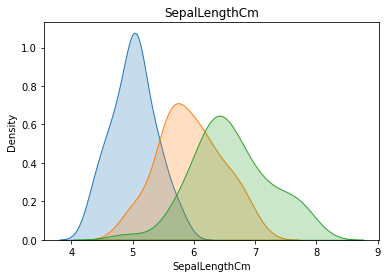

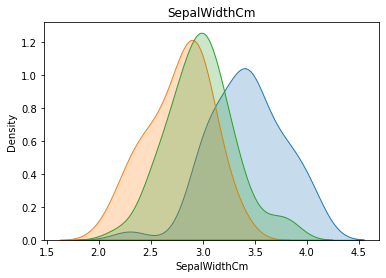

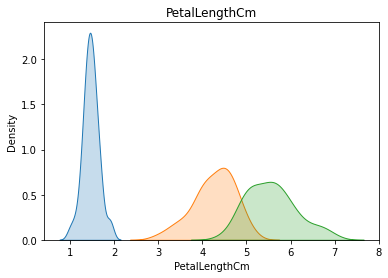

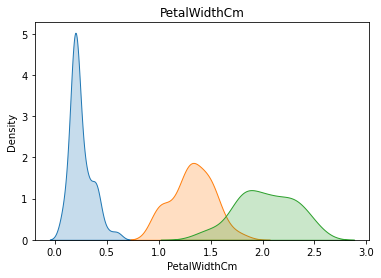

In [51]:
for i in data.columns[:-1]:
  sns.kdeplot(data=data.loc[data.Species=='Iris-setosa'][i], label="Iris-setosa",shade=True)
  sns.kdeplot(data=data.loc[data.Species=='Iris-versicolor'][i], label="Iris-versicolor",shade=True)
  sns.kdeplot(data=data.loc[data.Species=='Iris-virginica'][i], label="Iris-virginica",shade=True)
  plt.title(i)
  plt.show()

## **Correlation Matrix**

In [52]:
data.corr()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
SepalLengthCm,1.000000,-0.110155,0.871305,0.817058
SepalWidthCm,-0.110155,1.000000,-0.420140,-0.355139
PetalLengthCm,0.871305,-0.420140,1.000000,0.961883
PetalWidthCm,0.817058,-0.355139,0.961883,1.000000


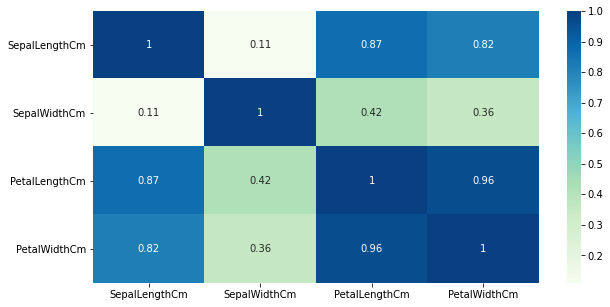

In [53]:
plt.figure(figsize=(10,5))
sns.heatmap(abs(data.corr()),cmap='GnBu',annot=True)

## **K-means Clustering**

In [54]:
from sklearn.cluster import KMeans

In [55]:
SSE=[]
for i in range(1,10):
  kmeans=KMeans(n_jobs=-1,n_clusters=i,init='k-means++')
  kmeans.fit(data.iloc[:,[0,1,2,3]])
  SSE.append(kmeans.inertia_)

Text(0.5, 1.0, "ELBOW METHOD TO DETERMINE OPTIMAL VALUE OF 'K'\n")

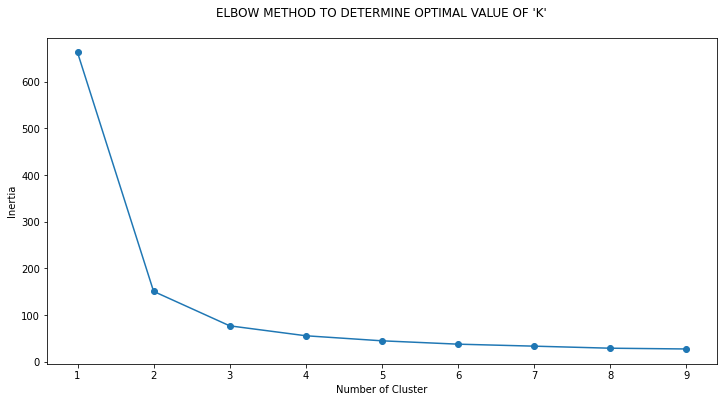

In [56]:
df=pd.DataFrame({'Cluster':range(1,10),'SSE':SSE})
plt.figure(figsize=(12,6))
plt.plot(df['Cluster'],df['SSE'],marker='o')
plt.xlabel('Number of Cluster')
plt.ylabel('Inertia')
plt.title("ELBOW METHOD TO DETERMINE OPTIMAL VALUE OF 'K'\n")

In [57]:
kmeans=KMeans(n_jobs=-1,n_clusters=3,init='k-means++')
kmeans.fit(data.iloc[:,[0,1,2,3]])
kmeans.cluster_centers_

array([[6.85      , 3.07368421, 5.74210526, 2.07105263],
       [5.01041667, 3.41979167, 1.4625    , 0.25      ],
       [5.90327869, 2.75      , 4.38196721, 1.42622951]])

In [58]:
kmeans.labels_

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0,
       0, 2, 2, 0, 0, 0, 0, 2, 0, 2, 0, 2, 0, 0, 2, 2, 0, 0, 0, 0, 0, 2,
       0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 2, 0, 0, 2], dtype=int32)

In [59]:
data['cluster']=kmeans.labels_
data

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species,cluster
0,5.1,3.5,1.4,0.2,Iris-setosa,1
1,4.9,3.0,1.4,0.2,Iris-setosa,1
2,4.7,3.2,1.3,0.2,Iris-setosa,1
3,4.6,3.1,1.5,0.2,Iris-setosa,1
4,5.0,3.6,1.4,0.2,Iris-setosa,1
...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica,0
146,6.3,2.5,5.0,1.9,Iris-virginica,2
147,6.5,3.0,5.2,2.0,Iris-virginica,0
148,6.2,3.4,5.4,2.3,Iris-virginica,0


In [60]:
display(data['cluster'].value_counts(),data['Species'].value_counts())

2    61
1    48
0    38
Name: cluster, dtype: int64

Iris-versicolor    50
Iris-virginica     49
Iris-setosa        48
Name: Species, dtype: int64

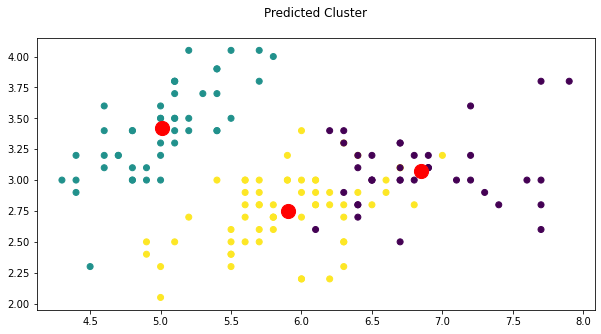

In [61]:
 plt.figure(figsize=(10,5))
 plt.scatter(data['SepalLengthCm'],data['SepalWidthCm'],c=data.cluster)
 plt.title('Predicted Cluster\n')
 plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1],s=200,c='red',label='Centroids')
 plt.show()

In [62]:
data.loc[data['Species']=='Iris-setosa']['cluster'].value_counts()  #The model has identified iris-setosa with 100% accuracy

1    48
Name: cluster, dtype: int64

In [63]:
data.loc[data['Species']=='Iris-versicolor']['cluster'].value_counts()

2    48
0     2
Name: cluster, dtype: int64

In [64]:
data.loc[data['Species']=='Iris-virginica']['cluster'].value_counts()

0    36
2    13
Name: cluster, dtype: int64

In [65]:
data['Species_encode']=data['Species'].apply(lambda x: 1 if x=='Iris-setosa' else 2 if x=='Iris-virginica' else 0)
data

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species,cluster,Species_encode
0,5.1,3.5,1.4,0.2,Iris-setosa,1,1
1,4.9,3.0,1.4,0.2,Iris-setosa,1,1
2,4.7,3.2,1.3,0.2,Iris-setosa,1,1
3,4.6,3.1,1.5,0.2,Iris-setosa,1,1
4,5.0,3.6,1.4,0.2,Iris-setosa,1,1
...,...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica,0,2
146,6.3,2.5,5.0,1.9,Iris-virginica,2,2
147,6.5,3.0,5.2,2.0,Iris-virginica,0,2
148,6.2,3.4,5.4,2.3,Iris-virginica,0,2


In [66]:
from sklearn.metrics import classification_report
print(classification_report(data['Species_encode'],data['cluster']))

              precision    recall  f1-score   support

           0       0.05      0.04      0.05        50
           1       1.00      1.00      1.00        48
           2       0.21      0.27      0.24        49

    accuracy                           0.43       147
   macro avg       0.42      0.44      0.43       147
weighted avg       0.42      0.43      0.42       147



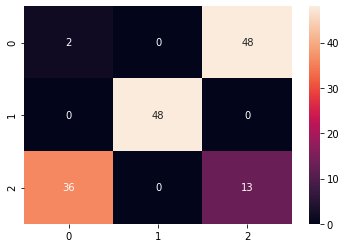

In [67]:
from sklearn.metrics import confusion_matrix
sns.heatmap(confusion_matrix(data['Species_encode'],data['cluster']),annot=True)

## **Task-2 Completed.**